# Sentiment Analysis

**Sentiment Analysis** is extremely useful in social media monitoring as it allows us to gain an overview of the wider public opinion behind certain topics.

In this case will be carried out sentiment analysis using Netizen tweet data about airlines. The data used is Twitter US Airline Sentiment which contains how travelers in February 2015 expressed their feelings on Twitter.

And here we can see how the characteristics of tweets Netizen related to Pnerbangan in US where netizen response data about US Airlines is listed in the Dataframe. And we can also rework the netizens tweets which can finally be seen what the word often appears in the netizens related tweets of US airlines.

## Outline

- Import Packages
- Import Data
- Data Pre-processing
- Data Exploration
- Sentiment Analysis

### 1a. Import Data

In [121]:
#import libraries
import pandas as pd 
import numpy as np

#import nltk module 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#import reguler expression 
import re

#import textblob 
from textblob import TextBlob

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#import tqdm 
from tqdm import tqdm 
tqdm.pandas()

#import beaurtiful soup 
from bs4 import BeautifulSoup

#save model 
import pickle 

#textblob
from textblob import Word

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\faizah064287\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1b. Import Data

In this case the tweet data from Twitter has been extracted into the form of a dataframe with CSV format. If the tweet data has not been extracted then Twitter's APIs can be used.

In [122]:
data=pd.read_csv('tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue's new CEO seeks the right balance to ...,NaN,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,NaN,nesi_1992,NaN,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,NaN,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.3460,United,NaN,CPoutloud,NaN,0,@united yes. We waited in line for almost an h...,NaN,2015-02-16 23:48:48 -0800,"Washington, DC",NaN
3,567592368451248130,negative,1.0,Late Flight,1.0000,United,NaN,brenduch,NaN,0,@united the we got into the gate at IAH on tim...,NaN,2015-02-16 23:52:20 -0800,NaN,Buenos Aires
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,NaN,VahidESQ,NaN,0,@SouthwestAir its cool that my bags take a bit...,NaN,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


### 2. Data Preparation

At this step is the process of setting up a netizen tweet to be able to identify the sentiment like whether in the tweet.

In [123]:
#Get Infromation number of rows and columns in data
data.shape

(14485, 15)

**Checking Missing Value**

In [124]:
# Checking number of missing values each variables

count_missing = data.isnull().sum().sort_values(ascending = False)
count_missing

negativereason_gold             14453
airline_sentiment_gold          14445
tweet_coord                     13478
negativereason                   5403
user_timezone                    4775
tweet_location                   4687
negativereason_confidence        4069
tweet_created                       0
text                                0
retweet_count                       0
name                                0
airline                             0
airline_sentiment_confidence        0
airline_sentiment                   0
tweet_id                            0
dtype: int64

In [125]:
#count percentage of missing values each variables of data
percentage = round(data.isnull().sum()/len(data)*100,2).sort_values(ascending = False)
percentage

negativereason_gold             99.78
airline_sentiment_gold          99.72
tweet_coord                     93.05
negativereason                  37.30
user_timezone                   32.97
tweet_location                  32.36
negativereason_confidence       28.09
tweet_created                    0.00
text                             0.00
retweet_count                    0.00
name                             0.00
airline                          0.00
airline_sentiment_confidence     0.00
airline_sentiment                0.00
tweet_id                         0.00
dtype: float64

From the missing value detection above, it appears that there is a feature that contains missing value, which feature: Negativereason_gold, Airline_sentiment_gold, Tweet_coord, Negativereason, User_timezone, Tweet_location, negativereason_confidence. From the results it appears that there is a feature that has a missing values percentage of more than 60% that is Negativereason_gold, Airline_sentiment_gold, Tweet_coord so that at the next stage will be done disposal of the feature and The information contained in the feature is not important.

As for the feature that has a percentage of missing values below 60 percent is Negativereason, User_timezone, Tweet_location, Negativereason_confidence. And after the observe in the feature Negativereason only contains negative words for the negative sentiment netizen so that in positive and neutral sentiment there is no negative reason data because it does not contain such an input, see The feature is not given any handlers. It also applies in feature negativereason_confidence that contains the negative confidence reason so that for sentiment positive and neutral is not present.

'user_timezone' and 'tweet_location' will be done by giving mode value to the missing data in the feature cause categorical variable.

**Handling Missing Values**

In [126]:
#Dropping faeture that contain more than 60% missing values

data=data.drop(['negativereason_gold', 'airline_sentiment_gold', 'tweet_coord'], axis=1)

In [127]:
#Handle missing values in categorical

data['user_timezone'] = data['user_timezone'].fillna(data['user_timezone'].mode().values[0])
data['tweet_location'] = data['tweet_location'].fillna(data['tweet_location'].mode().values[0])

**Droping Duplicate Tweet in Dataframe**

At this stage, a clean up of the tweet text data is duplicate so that there is no tweet and then set up a new dataframe that only analyzes the text of the tweet for further analysis purposes, i.e. identifying tweets Based on the text. 

However, since this data has been known for its sentimental results then the analysis of the tweet text is only up to the identification of the Wordcloud not to the classification model of the tweet text.
So later, exploration of data is also done using this Dataframe data airlines which contains many features.

In [128]:
#drop duplicate tweet 
g_unique = set()
for item in data['text']:
        g_unique.add(item) # ensures the element will only be copied if not already in the set
tweet = []
for item in g_unique:
    tweet.append(item)
    datatweet = pd.DataFrame(tweet,columns = ['text'])

In [129]:
len(datatweet)

14427

### 3. Data Pre-Processing

### 3A. Basic Text Pre-processing

### 1. Lower casing

In this step is done lower case on the letters tweet because when identified the same word will be identified 1 and there is no words reduntant because of the case difference of the letter where the detection differs by Python.

In [130]:
datatweet['text'] = datatweet['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
datatweet['text'].head()

0    @usairways decided to be a good sport and give...
1    @americanair everything for sorted out. thanks...
2    @usairways houston hub aa t. employee the bag ...
3    @united on top of that i paid for 1st class an...
4    @united i would like 2 speak @united vp of #cu...
Name: text, dtype: object

### 2. Punctuation removal

In this step will be done deleting all punctuation marks from string. If the character is a punctuation, it will be replaced with an empty string.

In [131]:
datatweet['text'] = datatweet['text'].str.replace('[^\w\s]','')  #replace w=word dan s=number to space
datatweet.head()

,text
0,usairways decided to be a good sport and give ...
1,americanair everything for sorted out thanks f...
2,usairways houston hub aa t employee the bag is...
3,united on top of that i paid for 1st class and...
4,united i would like 2 speak united vp of custe...


### 3. Stopwords removal

This step is done the front-end removal of the tweet text. This elimination means that the front-word waiver in the next process of analysis is considered insignificant.

In [132]:
stop = stopwords.words('english')
datatweet['text'] = datatweet['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
datatweet['text'].head(10)

0    usairways decided good sport give guys another...
1    americanair everything sorted thanks help exci...
2    usairways houston hub aa employee bag made pa ...
3       united top paid 1st class wife got stuck coach
4    united would like 2 speak united vp custexp ji...
5    united wtf username andor email addr signin st...
6                first base already like style jetblue
7    americanair cancelled flighted flight still de...
8    usairways time bracket call fix problemive att...
9    united another airport closer calgary fly tomo...
Name: text, dtype: object

### 4. Frequent words removal

This step is done identification of the word that often appears in the text of the tweet. The existence of the word is not important because only repeating so need to be done deletion. However, in some cases the words are repeated because it is important that the next step can be removed or maintained.

In [133]:
#Counting frequent word
freq = pd.Series(' '.join(datatweet['text']).split()).value_counts()[:10]
freq

united          4125
flight          3823
usairways       3036
americanair     2791
southwestair    2440
jetblue         2349
get             1326
cancelled       1034
thanks          1030
service          948
dtype: int64

Because the word existed is the word that indicates the type of aircraft and the response of netizens such as  "cancelled " and 'thanks' and others, so I decided don't delete the frequent word.

### 5. Rare words removal

This step contains the identification of the words that do not appear frequently.

In [134]:
rare_word = pd.Series(' '.join(datatweet['text']).split()).value_counts()[-10:]
rare_word

httptcosbgbn7ouxy    1
infuriating          1
wn4287               1
cncled               1
brave                1
insulin              1
goldsapphire         1
2017                 1
sobbing              1
httptco2ikbp8gxwi    1
dtype: int64

Because the word rarely appears in the tweet text it is best to do the deletion to facilitate the next process.

In [135]:
rare_word = list(rare_word.index)
datatweet['text'] = datatweet['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
datatweet['text'].head()

0    decided good sport give guys another shot delayed
1          everything sorted help excited home tonight
2    houston hub aa employee bag made pa oops probl...
3              top paid 1st class wife got stuck coach
4    would like 2 speak vp custexp jimmy samartzis ...
Name: text, dtype: object

### 6. Spelling correction

In this step is done the spelling corection, so that the word not true the author will be transformed into a word with the correct writing in the English word.

In [136]:
datatweet['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    decided good sport give guns another shot delayed
1          everything sorted help excited home tonight
2    houston hut a employee bag made pa loops probl...
3               top paid st class wife got stuck coach
4    would like 2 speak up custer jimmy samartzis s...
Name: text, dtype: object

### 7. Tokenization

Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens , perhaps at the same time throwing away certain characters, such as punctuation. 

In [137]:
TextBlob(datatweet['text'][1]).words

WordList(['everything', 'sorted', 'help', 'excited', 'home', 'tonight'])

### 8. Stemming

In this step, a tweet text is made into the original word.

In [138]:
st = PorterStemmer()
datatweet['text'] = datatweet['text'][:].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [139]:
datatweet.head()

,text
0,decid good sport give guy anoth shot delay
1,everyth sort help excit home tonight
2,houston hub aa employe bag made pa oop problem...
3,top paid 1st class wife got stuck coach
4,would like 2 speak vp custexp jimmi samartzi s...


### 9. Lematization

In this step the process of grouping together different forms of words so that they can be analyzed as a single item. As an example of the word cry, cried, crying then this word will be lematization to 'cr'.

In [140]:
from textblob import Word
nltk.download('wordnet')

datatweet['text'] = datatweet['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
datatweet['text'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\faizah064287\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0           decid good sport give guy anoth shot delay
1                 everyth sort help excit home tonight
2    houston hub aa employe bag made pa oop problem...
3              top paid 1st class wife got stuck coach
4    would like 2 speak vp custexp jimmi samartzi s...
Name: text, dtype: object

In [141]:
datatweet.head()

,text
0,decid good sport give guy anoth shot delay
1,everyth sort help excit home tonight
2,houston hub aa employe bag made pa oop problem...
3,top paid 1st class wife got stuck coach
4,would like 2 speak vp custexp jimmi samartzi s...


### 4. Data Exploration

In [142]:
#count sentiment 
sentiment = data.groupby(['airline_sentiment'])['airline_sentiment'].count()

#make dataframe that will be created a chart 
chart = pd.DataFrame(sentiment)
chart['tweet_count'] = chart['airline_sentiment']
chart.drop(['airline_sentiment'], axis = 1, inplace = True )
chart = chart.reset_index()

#make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['tweet_count']/chart['tweet_count'].sum()

**4.1 Barplot of airlines sentiment**

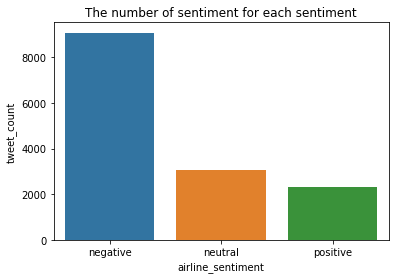

In [143]:
#make a barchar
ax = sns.barplot(x= 'airline_sentiment', y='tweet_count', data=chart)
ax = ax.set_title('The number of sentiment for each sentiment') 

In [144]:
data['airline_sentiment'].value_counts()

negative    9082
neutral     3069
positive    2334
Name: airline_sentiment, dtype: int64

**4.2 Piechart of airlines sentiment**

(-1.1202072772605616,
 1.2468369449482473,
 -1.1201615040198063,
 1.2359109677760107)

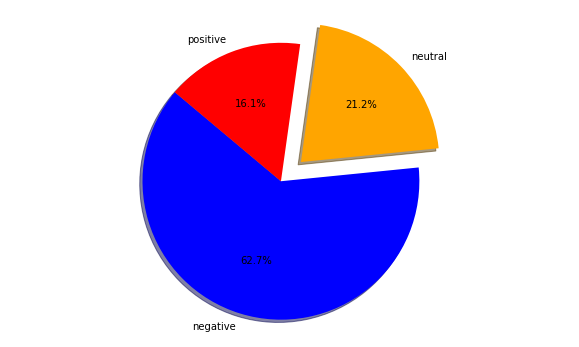

In [145]:
colors = [ 'blue','orange','red']
explode = (0, 0.2, 0)  # explode 1st slice
# Plot
figure = plt.figure(figsize= (10,6))
plt.pie(chart['tweet_count'], explode=explode, labels=chart['airline_sentiment'], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

From the data, barplot and pie chart above it appears that the majority of netizens tweet against US Airlines is negative, then the new neutral Positife. Looking at the data, airlines companies in the US must further improve their services to passengers both before their flight, on the flight and after the flight.

**4.3 Barplot of negative reason**

Text(0.5,0,'Type of Negative Reason')

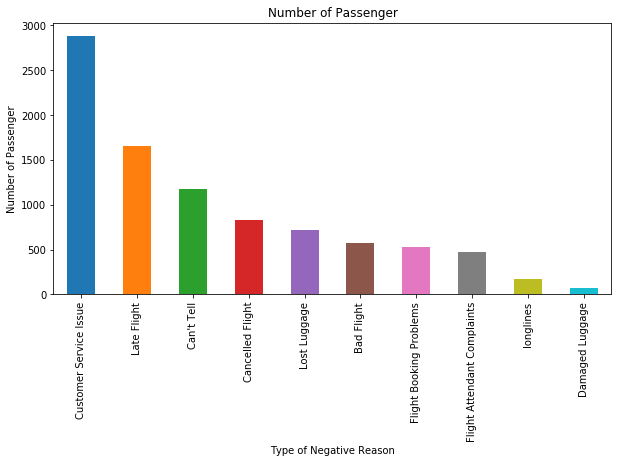

In [146]:
#make a barchar
data['negativereason'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Passenger")
plt.ylabel('Number of Passenger')
plt.xlabel('Type of Negative Reason')

Above is a barplot for the words ' negative reason ' which is given by passengers related to a Tweet airlines in the US.
It seems that the dominant word is ' customer service issues ' so according to the passengers they have not gotten a good service when using the airline. Furthermore, about delays in flying hours, flight cancellations, loss of luggage and poor and other flying experiences.

From the above results, company need to improve the service in several aspects above so that their services increase and impact on increasing the number of passengers.

**4.4 Barplot of Name Company Airlines**

Text(0.5,0,'Type of airlines')

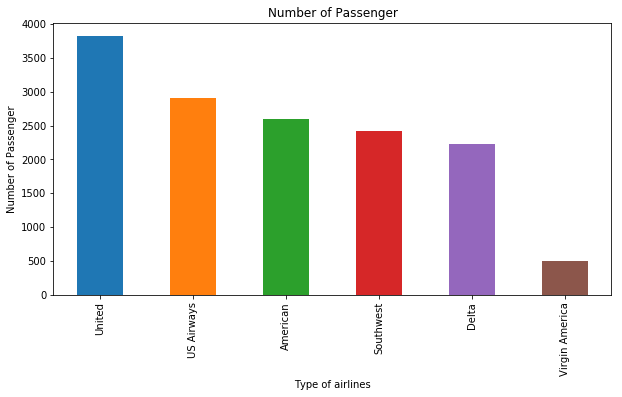

In [147]:
#make a barchar
data['airline'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Passenger")
plt.ylabel('Number of Passenger')
plt.xlabel('Type of airlines')

Name of company airline that is in US and number of flights that have been done. 

**4.5 Barplot of Name Company airlines by sentiment airline**

Text(0.5,1,'Barchart for Netizen tweet')

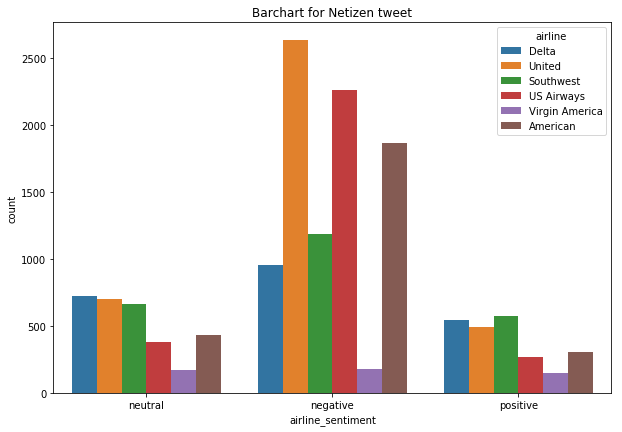

In [148]:
f=plt.figure(figsize=(10,15))
# Count Plot (a.k.a. Bar Plot)
f.add_subplot(2,1,1)
sns.countplot(x='airline_sentiment',hue='airline', data=data) 
# Rotate x-labels
plt.xticks(rotation=0)
plt.title('Barchart for Netizen tweet')

The results above are visualizing the sentiment of society against airlines in US. 
- To sentiment 'neutral', airlines get the neutral sentiment of the community is the Delta followed by United and Southwest and the least get a neutral response from the community is 'Virgin America'.
- For sentiment 'negative' , the airlines that get the highest negative sentimnet from the public are United, then U.S. Airways then American and the fewest 'Virgin America'.
- To sentiment 'positive', the airlines that get sentiment positive from the people of the Society are Southwest, then Delta, then united and the fewest ones get sentiment postive is Virgin America.

When viewed from flying hours, the United company has the most flying hours compared to other airlines and Virgin America has the fewest flying hours. From such proportions is reasonable if the community gives much sentiment to the United company. This sentiment should need to be evaluated by the United company that has been a lot of flight so the service can be maximal and the passengers do not move to other airlines. As for the company that is still a little hour, this needs to be an early evaluation so that the company can improve the service better and eventually many people start to use the flight.

### 5. Sentiment Analysis

### 5a. Wordcloud Text

Wordcloud identifies words that often appear on a netizens tweet in giving sentiment. From Worlcloud we can know the word that is key in the giving of the sentiment.

In [149]:
wordc = "".join(datatweet.text.values)

In [150]:
#make a wordcloud 
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

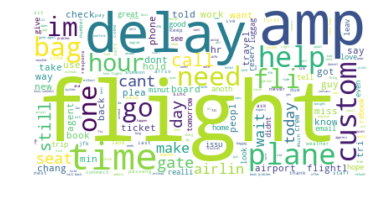

In [151]:
create_word_cloud(wordc)

Above is wordcloud from community tweet text. From the results it appears that the words that appear often are flight, time, delay, plane and other. It is seen based on the largest word in the Wordcloud. It is also aligned with the use of data about the airline sentiment then the word that appears often is about flight activities.

In [152]:
#define happy and not happy 
positive = data.loc[data['airline_sentiment'] == "positive"]
negative  = data.loc[data['airline_sentiment'] == "negative"]
netral  = data.loc[data['airline_sentiment'] == "neutral"]

In [153]:
#merge all the happy comments into one paragraph
all_text_positive = "".join(positive.text.values)
all_text_negative = "".join(negative.negativereason.values)
all_text_netral = "".join(netral.text.values)

In [154]:
#text = positive.text
#make a wordcloud 
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

### 5b. Wordcload negative sentimesnt based negative reason

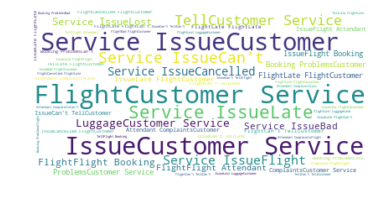

In [155]:
#negative 
create_word_cloud(all_text_negative)

Above is wordcloud based on 'negative reason' as discussed in the visualization that the word often existed is customer service, Issue and so on.

### 5b. Wordcload positive sentiment based text tweet

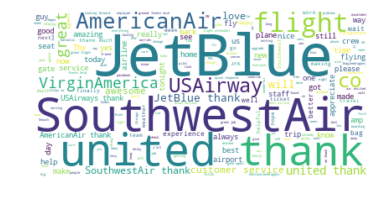

In [156]:
#positive
create_word_cloud(all_text_positive)

For positive sentiment, the most common words are southwestAir, JetBlue, Thank, United. This condition states that the community gives the highest sentiment positive on the flights and thank you.

### 5b. Wordcload netral sentiment based text tweet

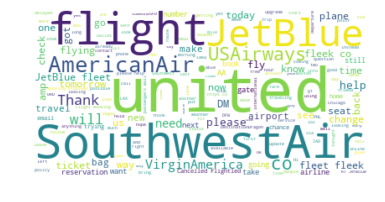

In [157]:
#netral
create_word_cloud(all_text_netral)

For neutral, the word often appears to be 'united', 'SouthwestAir', 'AmericanAir', 'Flight', 'JetBlue'. In this case the tweets given by netizens to neutral sentiment refer to the type of airline company.